<a href="https://colab.research.google.com/github/rrben/Regressao/blob/main/Regress%C3%A3o_Linear_Multipla_Sklearn_Aula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [24]:
#Importe o arquivo formato xlsx
limite = pd.read_excel("Limite_Credito_Dummy.xlsx")
limite.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
0,70,10736,5214,400,Fundamental_Medio,RJ,F,500
1,68,5000,5000,380,Fundamental_Medio,RJ,F,600
2,44,5800,5800,500,Fundamental_Medio,RJ,F,800
3,72,4300,4300,2000,Fundamental_Medio,RJ,F,1000
4,75,4400,4400,3000,Fundamental_Medio,RJ,F,1000


In [25]:
limite.describe()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,61.458333,12275.083333,10507.125000,2175.208333,5620.729167
std,15.284477,12640.654241,9332.173617,938.094469,6131.900367
min,30.000000,4300.000000,4027.000000,340.000000,500.000000
25%,47.000000,6380.000000,5950.000000,1925.000000,2262.500000
50%,66.500000,8400.000000,7400.000000,2000.000000,3550.000000
75%,70.000000,12378.250000,10163.000000,3000.000000,6500.000000
max,94.000000,81000.000000,54500.000000,3500.000000,35000.000000


In [26]:
limite.corr()

<ipython-input-26-7322287fa157>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  limite.corr()


,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial
Idade,1.000000,0.239445,0.213186,0.057183,0.228117
RendimentoTotal,0.239445,1.000000,0.960551,0.031041,0.858120
Salario,0.213186,0.960551,1.000000,0.081792,0.888839
LimitedeCreditoImediato,0.057183,0.031041,0.081792,1.000000,0.226990
LimitedoChequeEspecial,0.228117,0.858120,0.888839,0.226990,1.000000


In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#escolaridade
le.fit(limite.Escolaridade) 
limite.Escolaridade = le.transform(limite.Escolaridade)

# gênero
le.fit(limite.Gênero) 
limite.Gênero = le.transform(limite.Gênero)

#regiao
le.fit(limite.Região) 
limite.Região = le.transform(limite.Região)

In [55]:
limite.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
0,70,10736,5214,400,0,0,0,500
1,68,5000,5000,380,0,0,0,600
2,44,5800,5800,500,0,0,0,800
3,72,4300,4300,2000,0,0,0,1000
4,75,4400,4400,3000,0,0,0,1000


<Axes: xlabel='LimitedoChequeEspecial', ylabel='Count'>

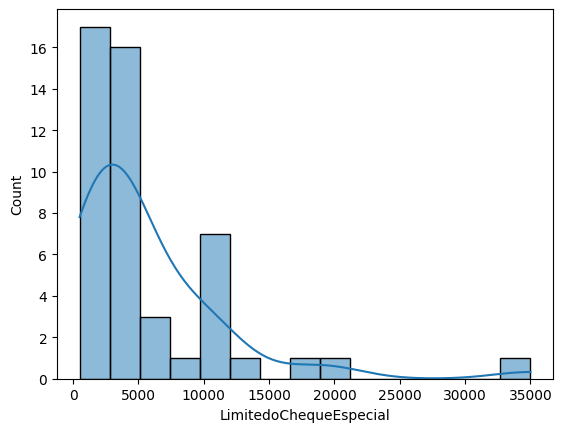

In [57]:
sns.histplot(limite, x="LimitedoChequeEspecial", kde=True)

<Axes: xlabel='Idade', ylabel='Count'>

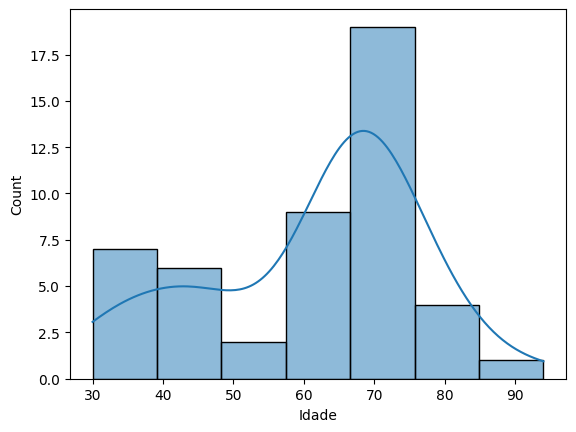

In [58]:
sns.histplot(limite, x="Idade", kde=True)

In [60]:
limite.describe()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,61.458333,12275.083333,10507.125000,2175.208333,0.375000,0.458333,0.500000,5620.729167
std,15.284477,12640.654241,9332.173617,938.094469,0.489246,0.503534,0.505291,6131.900367
min,30.000000,4300.000000,4027.000000,340.000000,0.000000,0.000000,0.000000,500.000000
25%,47.000000,6380.000000,5950.000000,1925.000000,0.000000,0.000000,0.000000,2262.500000
50%,66.500000,8400.000000,7400.000000,2000.000000,0.000000,0.000000,0.500000,3550.000000
75%,70.000000,12378.250000,10163.000000,3000.000000,1.000000,1.000000,1.000000,6500.000000
max,94.000000,81000.000000,54500.000000,3500.000000,1.000000,1.000000,1.000000,35000.000000


<Axes: xlabel='RendimentoTotal', ylabel='Count'>

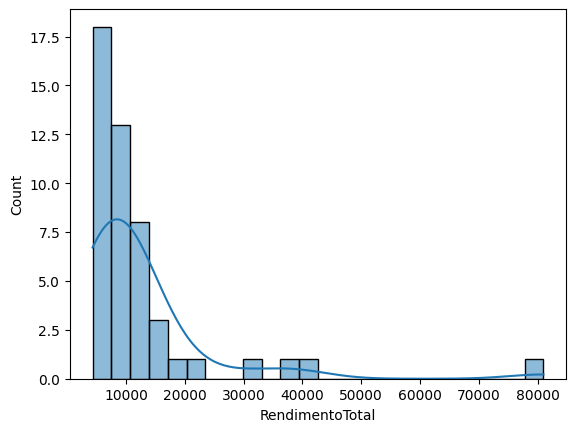

In [29]:
sns.histplot(limite, x="RendimentoTotal",kde=True)

<Axes: xlabel='Salario', ylabel='Count'>

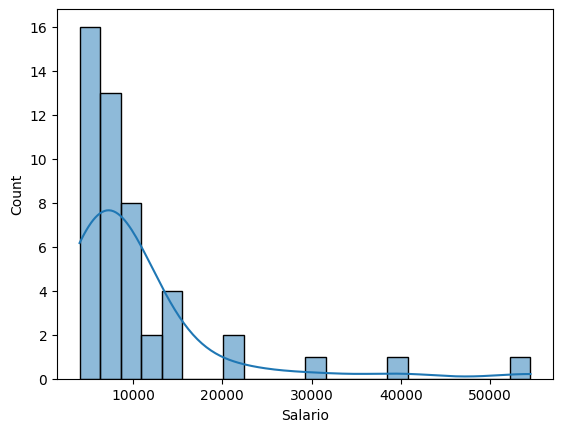

In [30]:
sns.histplot(limite, x="Salario", kde=True)

<Axes: xlabel='LimitedeCreditoImediato', ylabel='Count'>

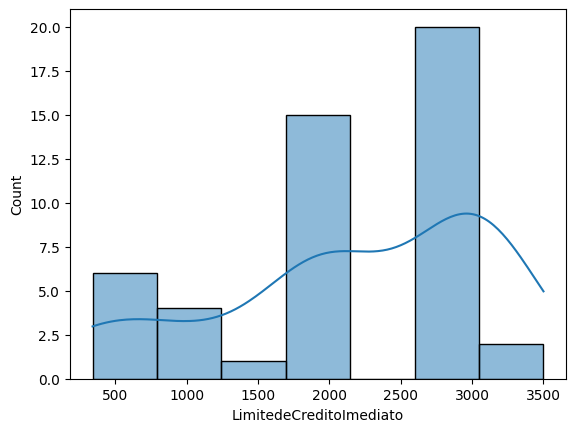

In [31]:
sns.histplot(limite, x="LimitedeCreditoImediato", kde=True)

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


limite_norm = pd.DataFrame(scaler.fit_transform(limite), index=limite.index, columns=limite.columns)

In [63]:
limite_norm.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
0,0.625000,0.083911,0.023518,0.018987,0.0,0.0,0.0,0.000000
1,0.593750,0.009126,0.019278,0.012658,0.0,0.0,0.0,0.002899
2,0.218750,0.019557,0.035128,0.050633,0.0,0.0,0.0,0.008696
3,0.656250,0.000000,0.005409,0.525316,0.0,0.0,0.0,0.014493
4,0.703125,0.001304,0.007390,0.841772,0.0,0.0,0.0,0.014493


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


limite_norm = pd.DataFrame(scaler.fit_transform(limite), index=limite.index, columns=limite.columns)

In [65]:
limite_norm.describe()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,0.491536,0.103978,0.128388,0.580762,0.375000,0.458333,0.500000,0.148427
std,0.238820,0.164806,0.184894,0.296865,0.489246,0.503534,0.505291,0.177736
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.265625,0.027119,0.038100,0.501582,0.000000,0.000000,0.000000,0.051087
50%,0.570312,0.053455,0.066828,0.525316,0.000000,0.000000,0.500000,0.088406
75%,0.625000,0.105323,0.121570,0.841772,1.000000,1.000000,1.000000,0.173913
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
limite_norm.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
0,0.625000,0.083911,0.023518,0.018987,0.0,0.0,0.0,0.000000
1,0.593750,0.009126,0.019278,0.012658,0.0,0.0,0.0,0.002899
2,0.218750,0.019557,0.035128,0.050633,0.0,0.0,0.0,0.008696
3,0.656250,0.000000,0.005409,0.525316,0.0,0.0,0.0,0.014493
4,0.703125,0.001304,0.007390,0.841772,0.0,0.0,0.0,0.014493


<Axes: xlabel='Idade', ylabel='Count'>

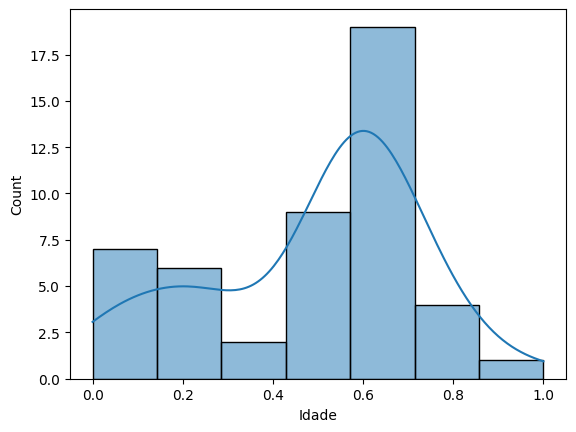

In [67]:
sns.histplot(limite_norm, x="Idade", kde=True)

<Axes: xlabel='RendimentoTotal', ylabel='Count'>

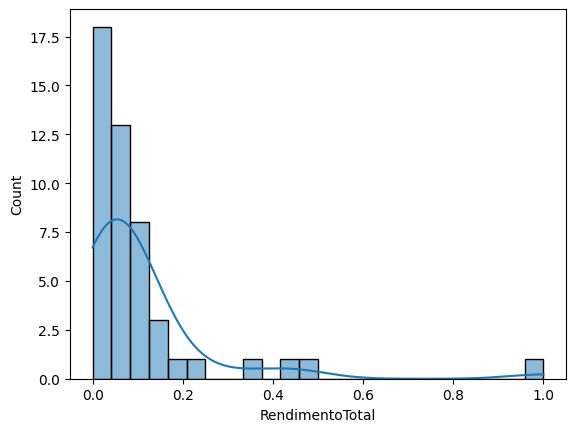

In [68]:
sns.histplot(limite_norm, x="RendimentoTotal", kde=True)

<Axes: xlabel='Salario', ylabel='Count'>

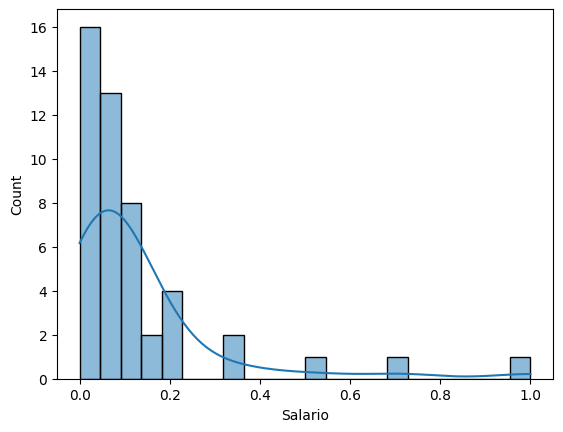

In [69]:
sns.histplot(limite_norm, x="Salario", kde=True)

<Axes: xlabel='LimitedeCreditoImediato', ylabel='Count'>

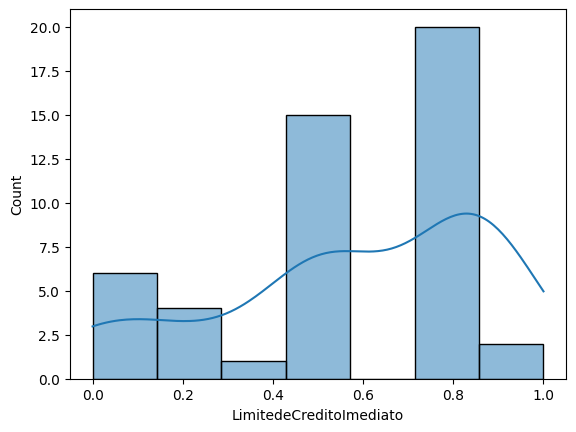

In [70]:
sns.histplot(limite_norm, x="LimitedeCreditoImediato", kde=True)

In [41]:
limite.describe()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,61.458333,12275.083333,10507.125000,2175.208333,0.375000,0.458333,0.500000,5620.729167
std,15.284477,12640.654241,9332.173617,938.094469,0.489246,0.503534,0.505291,6131.900367
min,30.000000,4300.000000,4027.000000,340.000000,0.000000,0.000000,0.000000,500.000000
25%,47.000000,6380.000000,5950.000000,1925.000000,0.000000,0.000000,0.000000,2262.500000
50%,66.500000,8400.000000,7400.000000,2000.000000,0.000000,0.000000,0.500000,3550.000000
75%,70.000000,12378.250000,10163.000000,3000.000000,1.000000,1.000000,1.000000,6500.000000
max,94.000000,81000.000000,54500.000000,3500.000000,1.000000,1.000000,1.000000,35000.000000


In [42]:
limite_norm.describe()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
count,4.800000e+01,4.800000e+01,4.800000e+01,4.800000e+01,4.800000e+01,4.800000e+01,48.000000,4.800000e+01
mean,-1.295260e-16,-5.551115e-17,1.850372e-17,-1.480297e-16,-2.775558e-17,1.387779e-16,0.000000,-7.401487e-17
std,1.010582e+00,1.010582e+00,1.010582e+00,1.010582e+00,1.010582e+00,1.010582e+00,1.010582,1.010582e+00
min,-2.079969e+00,-6.375839e-01,-7.017336e-01,-1.977017e+00,-7.745967e-01,-9.198662e-01,-1.000000,-8.439339e-01
25%,-9.559591e-01,-4.712942e-01,-4.934917e-01,-2.695423e-01,-7.745967e-01,-9.198662e-01,-1.000000,-5.534609e-01
50%,3.333460e-01,-3.098013e-01,-3.364710e-01,-1.887469e-01,-7.745967e-01,-9.198662e-01,0.000000,-3.412714e-01
75%,5.647597e-01,8.247865e-03,-3.726534e-02,8.885244e-01,1.290994e+00,1.087115e+00,1.000000,1.449103e-01
max,2.151597e+00,5.494350e+00,4.763994e+00,1.427160e+00,1.290994e+00,1.087115e+00,1.000000,4.841920e+00


In [71]:
import statsmodels.formula.api as smf

In [72]:
#modelo MRLS
function = 'LimitedoChequeEspecial~Idade+RendimentoTotal+Salario+LimitedeCreditoImediato+Escolaridade+Região+Gênero'
model = smf.ols(formula=function, data=limite_norm).fit() 
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.886
Model:                                OLS   Adj. R-squared:                  0.865
Method:                     Least Squares   F-statistic:                     44.20
Date:                    Sat, 06 May 2023   Prob (F-statistic):           7.44e-17
Time:                            12:05:29   Log-Likelihood:                 67.328
No. Observations:                      48   AIC:                            -118.7
Df Residuals:                          40   BIC:                            -103.7
Df Model:                               7                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [75]:
#modelo MRLS - Idade
function = 'LimitedoChequeEspecial~RendimentoTotal+Salario+LimitedeCreditoImediato+Escolaridade+Região+Gênero'
model = smf.ols(formula=function, data=limite_norm).fit() 
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.885
Model:                                OLS   Adj. R-squared:                  0.869
Method:                     Least Squares   F-statistic:                     52.78
Date:                    Sat, 06 May 2023   Prob (F-statistic):           9.97e-18
Time:                            12:08:12   Log-Likelihood:                 67.299
No. Observations:                      48   AIC:                            -120.6
Df Residuals:                          41   BIC:                            -107.5
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [76]:
#modelo MRLS - Limite Crédito Imediato
function = 'LimitedoChequeEspecial~RendimentoTotal+Salario+Escolaridade+Região+Gênero'
model = smf.ols(formula=function, data=limite_norm).fit() 
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.884
Model:                                OLS   Adj. R-squared:                  0.871
Method:                     Least Squares   F-statistic:                     64.26
Date:                    Sat, 06 May 2023   Prob (F-statistic):           1.39e-18
Time:                            12:08:21   Log-Likelihood:                 67.097
No. Observations:                      48   AIC:                            -122.2
Df Residuals:                          42   BIC:                            -111.0
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
In

In [77]:
#modelo MRLS - Escolaridade
function = 'LimitedoChequeEspecial~RendimentoTotal+Salario+Região+Gênero'
model = smf.ols(formula=function, data=limite_norm).fit() 
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.883
Model:                                OLS   Adj. R-squared:                  0.872
Method:                     Least Squares   F-statistic:                     80.75
Date:                    Sat, 06 May 2023   Prob (F-statistic):           2.02e-19
Time:                            12:09:04   Log-Likelihood:                 66.709
No. Observations:                      48   AIC:                            -123.4
Df Residuals:                          43   BIC:                            -114.1
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
In

In [78]:
#modelo MRLS - Rendimento Total
function = 'LimitedoChequeEspecial~Salario+Região+Gênero'
model = smf.ols(formula=function, data=limite_norm).fit() 
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.879
Model:                                OLS   Adj. R-squared:                  0.871
Method:                     Least Squares   F-statistic:                     106.7
Date:                    Sat, 06 May 2023   Prob (F-statistic):           3.24e-20
Time:                            12:09:53   Log-Likelihood:                 66.039
No. Observations:                      48   AIC:                            -124.1
Df Residuals:                          44   BIC:                            -116.6
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

In [79]:
#modelo MRLS - Intercept
function = 'LimitedoChequeEspecial~Salario+Região+Gênero-1'
model = smf.ols(formula=function, data=limite_norm).fit() 
print(model.summary())

                                   OLS Regression Results                                  
Dep. Variable:     LimitedoChequeEspecial   R-squared (uncentered):                   0.925
Model:                                OLS   Adj. R-squared (uncentered):              0.920
Method:                     Least Squares   F-statistic:                              185.0
Date:                    Sat, 06 May 2023   Prob (F-statistic):                    2.56e-25
Time:                            12:10:13   Log-Likelihood:                          64.573
No. Observations:                      48   AIC:                                     -123.1
Df Residuals:                          45   BIC:                                     -117.5
Df Model:                               3                                                  
Covariance Type:                nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-

In [80]:
x = limite_norm[["Salario","Região","Gênero"]]

y = limite_norm[["LimitedoChequeEspecial"]]

In [85]:
#Separando os dados de Treino e Teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Criando um Objeto de Regressão Linear
lr = LinearRegression()

#Treinando o Modelo
lr.fit(x_train,y_train)

LinearRegression()

In [86]:
r_sq = lr.score(x, y)
print('Coeficiente de Determinação (R²):', r_sq)

Coeficiente de Determinação (R²): 0.87437003221887


In [87]:
y_pred_train = lr.predict(x_train)
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

MAE: 0.03369009365701895
MSE: 0.002252899550747987
RMSE: 0.04746471901052388


In [88]:
y_pred = lr.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.06987270468300603
MSE: 0.01009174141999736
RMSE: 0.10045765983735316
